## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

### 將收入分組

In [3]:
app_train["INCOME_BINNED"] = pd.qcut(app_train["AMT_INCOME_TOTAL"], q=10)
app_train["INCOME_BINNED"].head()

0    (180000.0, 225000.0]
1    (225000.0, 270000.0]
2    (25649.999, 81000.0]
3    (112500.0, 135000.0]
4    (112500.0, 135000.0]
Name: INCOME_BINNED, dtype: category
Categories (10, interval[float64]): [(25649.999, 81000.0] < (81000.0, 99000.0] < (99000.0, 112500.0] < (112500.0, 135000.0] ... (162000.0, 180000.0] < (180000.0, 225000.0] < (225000.0, 270000.0] < (270000.0, 117000000.0]]

### 根據組別作圖

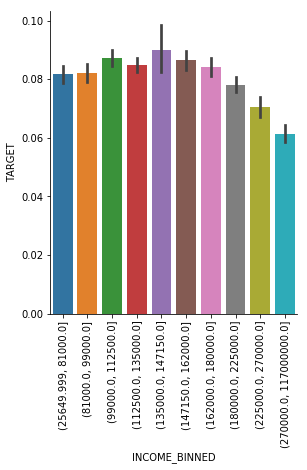

In [7]:
import seaborn as sns
axes = sns.catplot(x='INCOME_BINNED', y='TARGET', data=app_train, kind='bar')
axes.set_xticklabels(rotation=90)

#### Y軸的target都介於0到0.1是因為分組後的平均數的關係

In [6]:
income_bins_sorted = app_train.sort_values(by='INCOME_BINNED')
income_groups = income_bins_sorted.groupby('INCOME_BINNED').mean()
income_groups

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
INCOME_BINNED,,,,,,,,,,,,,,,,,,,,,
"(25649.999, 81000.0]",277043.955886,0.081908,0.114432,0.176006,0.685754,0.375460,66254.124685,349964.649471,16708.066994,312117.900549,...,0.024468,0.005121,0.001887,0.003923,0.141116,0.173430,0.017669,0.389866,0.007936,0.374322
"(81000.0, 99000.0]",278577.382596,0.082232,0.121565,0.220178,0.688672,0.407629,91089.278813,428164.658620,19962.134058,381692.300318,...,0.024736,0.006770,0.002576,0.004293,0.173547,0.197292,0.018659,0.451585,0.008421,0.248283
"(99000.0, 112500.0]",278653.817975,0.087192,0.111063,0.262769,0.695478,0.407348,111333.276330,478992.017111,22144.588886,427010.102238,...,0.027204,0.006638,0.003197,0.004715,0.192701,0.205408,0.018072,0.482049,0.007858,0.199014
"(112500.0, 135000.0]",277726.641323,0.084894,0.096993,0.309239,0.690188,0.416262,131852.488657,540955.693914,24726.963858,483031.367268,...,0.026756,0.006878,0.003153,0.005486,0.211448,0.207517,0.018301,0.506233,0.007431,0.171918
"(135000.0, 147150.0]",277690.509116,0.090007,0.073621,0.307870,0.676437,0.378260,142953.056026,604463.525040,26519.573061,541242.533934,...,0.029772,0.004847,0.006000,0.005308,0.211170,0.204016,0.013847,0.504270,0.005770,0.209093
"(147150.0, 162000.0]",278409.153760,0.086407,0.083258,0.340874,0.700643,0.414428,157141.512098,601606.203808,27193.437673,537862.172433,...,0.029177,0.007584,0.004595,0.005013,0.218091,0.217192,0.017898,0.525418,0.008933,0.153406
"(162000.0, 180000.0]",278427.724205,0.084224,0.079957,0.395421,0.689617,0.431866,178061.632269,656241.048121,29460.009820,588952.447696,...,0.031755,0.007654,0.005862,0.006253,0.232804,0.215542,0.017327,0.548039,0.007165,0.129267
"(180000.0, 225000.0]",278415.224040,0.078065,0.079247,0.426142,0.700150,0.427347,212733.495347,721710.566705,32096.388497,650022.271966,...,0.033788,0.008771,0.008190,0.005178,0.242183,0.226740,0.017586,0.570845,0.007833,0.121873
"(225000.0, 270000.0]",278727.850529,0.070401,0.073258,0.467004,0.697800,0.431578,259491.085277,803444.348274,35445.282833,727113.804726,...,0.034925,0.009069,0.009270,0.006364,0.260560,0.228742,0.015433,0.595330,0.006263,0.104324


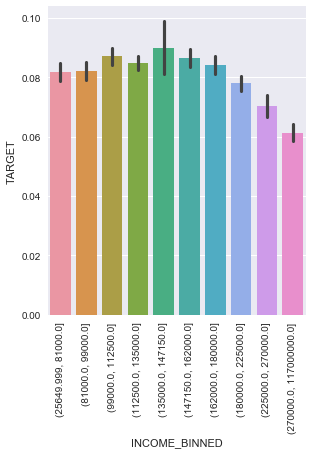

In [8]:
plt.style.use('seaborn')
axes2 = sns.catplot(x='INCOME_BINNED', y='TARGET', data=app_train, kind='bar')
axes2.set_xticklabels(rotation=90)